In [1]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np                         # Good module for matrix and matrix operation
import matplotlib.pyplot as plt            # Module to produce figure
import matplotlib.colors as colors
import os                                  # Used to convert png to other format
#import rpnpy.librmn.all as rmn             # Module to read RPN files
from matplotlib import gridspec,rc
#import rpn_funcs_chris
#from rpn_funcs_chris import open_var_2d, lambert_map
from matplotlib.path import Path
import matplotlib.patches as patches
import netCDF4
from statistics import median_low, median_high, median, mean
plt.rcParams['savefig.facecolor']='white'

/sw/spack-levante/mambaforge-23.1.0-1-Linux-x86_64-3boc6i/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
fs=11

def get_verts_new(categ_box):
    verts = [(categ_box['west'], categ_box['south']), 
     (categ_box['west'], categ_box['north']), 
     (categ_box['east'], categ_box['north']), 
     (categ_box['east'], categ_box['south']), 
     (0., 0.)]
    return verts

box = {'west':-180, 'east':0, 'north':80, 'south':20}

data = open('./PDF_TPexceedance_duration_p98p0_NNA_ERA5.txt','r')
ranges=np.arange(0.5,72.5,1)
ranges_int=np.arange(0.5,72.5,1)*0.5

durationPDF=[]
intensityFdur=[]
intensityPDF=[]

for i, line in enumerate(data):
    words=line.split()
    durationPDF0   =float(words[0])  # the pdf of duration (each line increases by 1 hour)
    intensityFdur0 =float(words[1])  # averaged exeedance (intensity) as a function of duration
    intensityPDF0  =float(words[2])  # the pdf of exeedance (each line increases by 0.2 mm/hr)
    
    durationPDF.append(durationPDF0)
    intensityFdur.append(intensityFdur0)
    intensityPDF.append(intensityPDF0)
    
data1 = open('./PDF_TPexceedance_duration_p99p0_NNA_ERA5.txt','r')

durationPDF1=[]
intensityFdur1=[]
intensityPDF1=[]

for i, line in enumerate(data1):
    words1=line.split()
    durationPDF0   =float(words1[0])  # the pdf of duration (each line increases by 1 hour)
    intensityFdur0 =float(words1[1])  # averaged exeedance (intensity) as a function of duration
    intensityPDF0  =float(words1[2])  # the pdf of exeedance (each line increases by 0.2 mm/hr)
    
    durationPDF1.append(durationPDF0)
    intensityFdur1.append(intensityFdur0)
    intensityPDF1.append(intensityPDF0)
    
data2 = open('./PDF_TPexceedance_duration_p99p9_NNA_ERA5.txt','r')

durationPDF2=[]
intensityFdur2=[]
intensityPDF2=[]

for i, line in enumerate(data2):
    words2=line.split()
    durationPDF0   =float(words2[0])  # the pdf of duration (each line increases by 1 hour)
    intensityFdur0 =float(words2[1])  # averaged exeedance (intensity) as a function of duration
    intensityPDF0  =float(words2[2])  # the pdf of exeedance (each line increases by 0.2 mm/hr)
    
    durationPDF2.append(durationPDF0)
    intensityFdur2.append(intensityFdur0)
    intensityPDF2.append(intensityPDF0)
    
contmax = max(intensityFdur)
indmax = intensityFdur.index(contmax)
print(indmax)

conta = np.array(intensityFdur)
contmean = mean(conta)
difference_array = np.absolute(conta-contmean)
indmean = difference_array.argmin()
print(indmean)

contmax1 = max(intensityFdur1)
indmax1 = intensityFdur1.index(contmax1)
print(indmax1)

cont1a = np.array(intensityFdur1)
contmean1 = mean(cont1a)
difference_array1 = np.absolute(cont1a-contmean1)
indmean1 = difference_array1.argmin()
print(indmean1)

contmax2 = max(intensityFdur2)
indmax2 = intensityFdur2.index(contmax2)
print(indmax2)

cont2a = np.array(intensityFdur2)
contmean2 = mean(cont2a)
difference_array2 = np.absolute(cont2a-contmean2)
indmean2 = difference_array2.argmin()
print(indmean2)

3
16
2
14
1
9


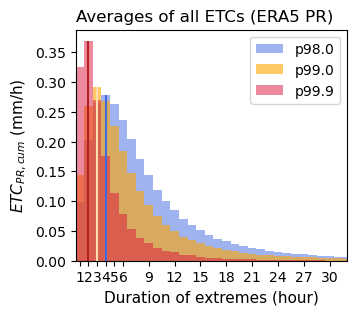

In [5]:
fs0=10
fs =11
fig = plt.figure(figsize=(3.5,3))
gs = gridspec.GridSpec(1,1)
#fig.suptitle('Accumulated extreme TP duration='+str(extremeTPh)+'h')
width=1
hwidth=width*0.5


c1='royalblue'
c2='orange'
c3='crimson'
c3b='firebrick'

ax1=plt.subplot(gs[0])

ax1.bar(ranges+hwidth,intensityFdur,width,color=c1,label='p98.0',alpha=0.5)   
ax1.bar(ranges+hwidth,intensityFdur1,width,color=c2,label='p99.0',alpha=0.6)  
ax1.bar(ranges+hwidth,intensityFdur2,width,color=c3,label='p99.9',alpha=0.5)   
plt.vlines(x=indmax+hwidth+0.5,ymin=0, ymax=contmax,linewidth=1.5, linestyles='solid',color=c1,alpha=1)
plt.vlines(x=indmax1+hwidth+0.5,ymin=0, ymax=contmax1,linewidth=1.5,linestyles='solid',color='navajowhite',alpha=1)
plt.vlines(x=indmax2+hwidth+0.5,ymin=0, ymax=contmax2,linewidth=1.5, linestyles='solid',color=c3b,alpha=1)


ax1.set_ylabel(''r'$ETC_{PR,cum}$'' (mm/h)',fontsize=fs)
ax1.set_xlim(0.5,32)


ax1.set_xlabel('Duration of extremes (hour)',fontsize=fs)
ax1.set_xticks([1,2,3,4,5,6,9,12,15,18,21,24,27,30])
plt.legend(fontsize=fs0)
ax1.set_title('Averages of all ETCs (ERA5 PR)',loc='left')

plt.savefig('./PDF_PR_contribution_together', bbox_inches='tight', dpi=200)
plt.show()
plt.close()
